<a href="https://colab.research.google.com/github/juanmbraga/Alura-Imersao-Dados/blob/main/Aula%201%20-%20Dados%20da%20Educacao/Aula%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


## Alguns testes e comentarios

In [ ]:
notas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

# Como diabos em python nao precisa declarar o tipo da variavel!?

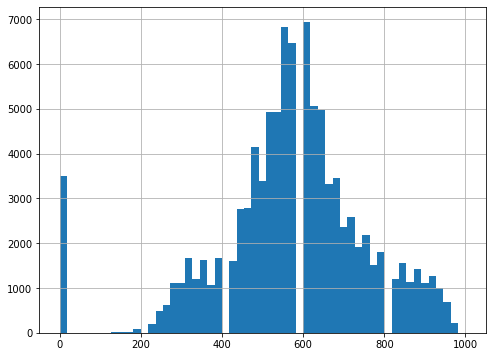

In [ ]:
dados["NU_NOTA_REDACAO"].hist(bins = 55, figsize=(8, 6))

# hist -> histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8558ef390>,
      dtype=object)

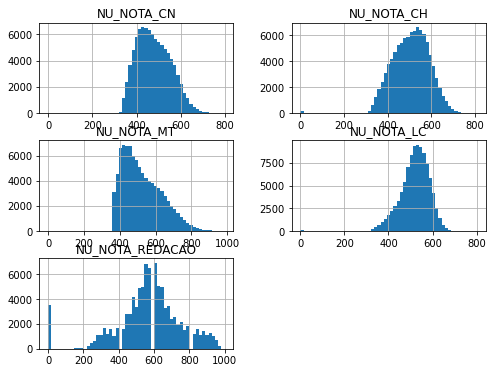

In [ ]:
dados[notas].hist(bins = 55, figsize=(8, 6))

# aparentemente e possivel criar multiplos histogramas se usar as variaveis magicas de python
# sera que eu poderia ler "dados["colunaX"]" como "pegue a colunaX da variavel dados"?

In [ ]:
# dados[provas].boxplot(grid=True, figsize= (10,8))

# por que nao funciona? o erro diz que "provas" nao foi definido, mas eu fiz isso ali em cima, e ainda usei na seguinte

# Desafio 2: tentando ver os estados dos estudantes de 13 anos

In [ ]:
# Desafio 2: tentando ver os estados dos estudantes de 13 anos
# DEU CERTO!

# dados.query("NU_IDADE" == 13)["SG_UF_RESIDENCIA", "NU_IDADE"]   aspas curiosamente "abracam" tudo da expressao 

# query serve para procurar baseado em uma expressao booleana

# dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA", "NU_IDADE"]   pq nao da??

# dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA", "NU_IDADE"].value_counts() 

# dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA", "NU_IDADE"].value_counts().sort_index()   sort nao parece servir muito aqui

# dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"]["NU_IDADE"].value_counts()  seguindo algo que vi no discord 

dados.query("NU_IDADE == 13")[["SG_UF_RESIDENCIA","NU_IDADE"]].value_counts()

# acabo de rever a aula e ele comentou brevemente sobre isso. Lerdeza minha haha
# resultados no README.md no github

SG_UF_RESIDENCIA  NU_IDADE
SP                13          1
MT                13          1
BA                13          1
AP                13          1
dtype: int64

### Outros testes

In [ ]:
# quantos estados estao presentes na amostra?

dados["SG_UF_RESIDENCIA"].describe()

count     127380
unique        27
top           SP
freq       20264
Name: SG_UF_RESIDENCIA, dtype: object

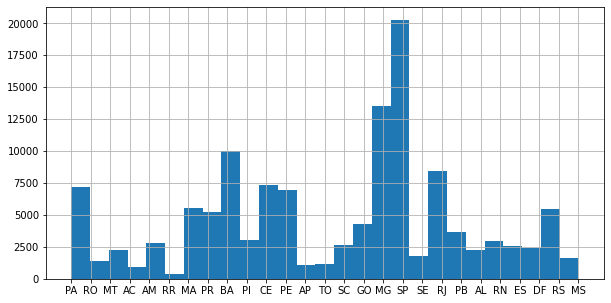

In [ ]:
# histograma com o numero de estados nas barras (bins)

dados["SG_UF_RESIDENCIA"].hist(bins=27, figsize=(10,5))

# Desafio 3: Adicionar título no gráfico

Text(0.5, 1.0, 'Presenca de estados na amostra.')

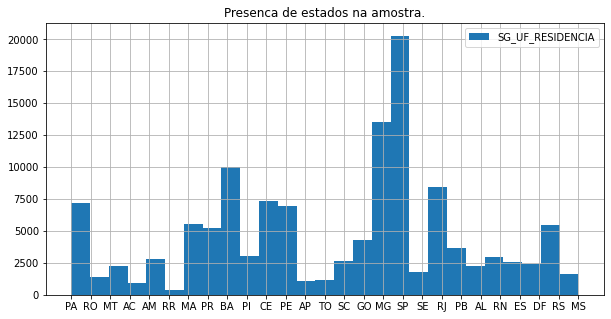

In [ ]:

dados["SG_UF_RESIDENCIA"].hist(bins=27, figsize=(10,5), legend=1)

# pl.title("Estados presentes na amostra.") segundo stackoverflow
# fig.suptitle("Estados presentes na amostra.") segundo strackoverflow
# legend parece tambem nao servir, hmmm....
# plt.suptitle("Teste")
# plt.title("Teste")

# De acordo com outro caderno que pude conferir (Marcos Ouriques), adicionar matplotlib funcionaria
import matplotlib.pyplot as plt
plt.title("Presenca de estados na amostra.")

# Desafio 1: Proporção dos inscritos por idade.

In [ ]:


# https://stackoverflow.com/questions/23539832/how-to-calculate-percentage-with-pandas-dataframe

# dados["TESTE"] = dados["NU_IDADE"]/dados["NU_IDADE"].sum()
# dados[["NU_IDADE", "TESTE"]]
# dados[["NU_IDADE", "TESTE"]].sort_index() Nao ordena pela idade. PQ?

# dados["NU_IDADE"].value_counts()/dados["NU_IDADE"].sum()  nao funciona...

# dados["NU_IDADE"].value_counts()/dados["NU_IDADE"].value_counts().sum()   tbm nao...

# dados["NU_IDADE"].value_counts()/dados["NU_IDADE"].value_counts().sum()*100 FUNCIONA! agr, como ordenar

# dados["NU_IDADE"].value_counts()/dados["NU_IDADE"].value_counts().sum()*100.sort_index()    Obviamente nao da pra adicionar uma "funcao" depois de uma operacao matematica

(dados["NU_IDADE"].value_counts()/dados["NU_IDADE"].value_counts().sum()*100).sort_index()

# Nao parece ser o meio mais eficiente para fazer isso, mas como nao sei nada de python ou panda

13     0.003140
14     0.110692
15     1.577171
16     6.146962
17    16.687078
        ...    
73     0.001570
75     0.001570
76     0.000785
77     0.000785
82     0.000785
Name: NU_IDADE, Length: 65, dtype: float64

## Mais experimentos

In [ ]:
# Calcular total de idades diferentes

# dados["NU_IDADE"].unique()  Como somar?
# dados["NU_IDADE"].unique().sum  Nao da certo.
# dados["NU_IDADE"].unique().value_counts()   Tambem nao...
# dados["NU_IDADE"].unique().describe()   Pq nao funciona?

len(dados["NU_IDADE"].unique())

65

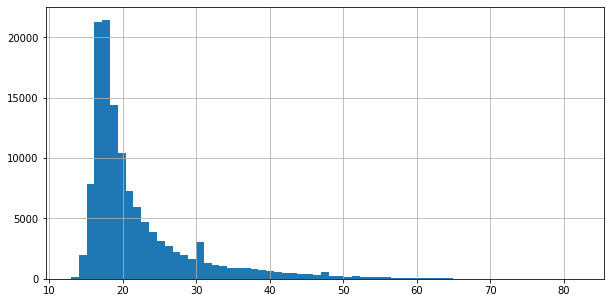

In [ ]:
# Dados com as idades distribuidas corretamente

dados["NU_IDADE"].hist(bins=65, figsize=(10,5))

# Desafio 4: Plotar os Histogramas das idades dos do treineiro e não treineiros.


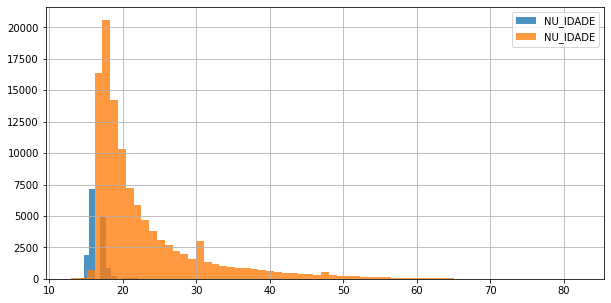

In [ ]:
# https://data36.com/plot-histogram-python-pandas/

# dados.query("IN_TREINEIRO=1")["NU_IDADE"].query("IN_TREINEIRO=0")["NU_IDADE"].hist()

# dados.query("IN_TREINEIRO=1", "IN_TREINEIRO=0")["NU_IDADE"].box.plot()

# dados.query("IN_TREINEIRO=1")["NU_IDADE"].hist()

# dados.query("IN_TREINEIRO=1")["NU_IDADE"].hist()

dados.query("IN_TREINEIRO==1")["NU_IDADE"].hist(alpha=0.8, bins=65, figsize=(10,5), legend=1)
dados.query("IN_TREINEIRO==0")["NU_IDADE"].hist(alpha=0.8, bins=65, figsize=(10,5), legend=1)

# Desafio 5: Comparar as distribuições das provas em inglês espanhol

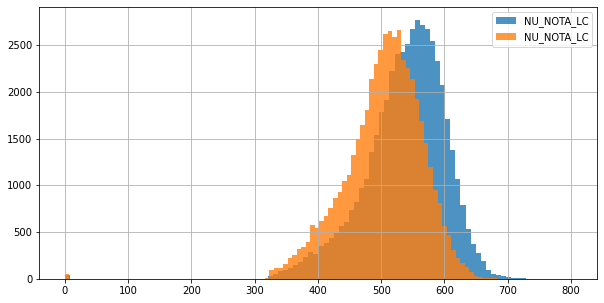

In [ ]:
dados.query("TP_LINGUA==0")["NU_NOTA_LC"].hist(alpha=0.8, bins=100, figsize=(10,5), legend=1)
dados.query("TP_LINGUA==1")["NU_NOTA_LC"].hist(alpha=0.8, bins=100, figsize=(10,5), legend=1)

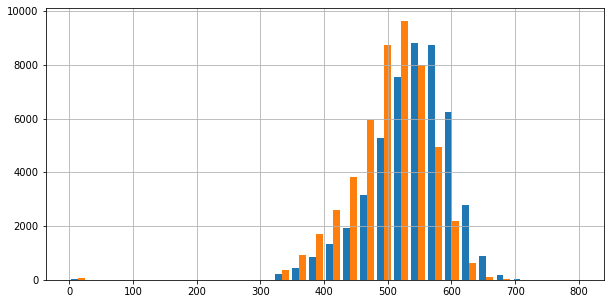

In [ ]:
# dados.query("TP_LINGUA==0")["NU_NOTA_LC"].plot.box()
# dados.query("TP_LINGUA==1")["NU_NOTA_LC"].plot.box()
# Como diabos separar as caixas?

teste["ingles"] = dados.query("TP_LINGUA==0")["NU_NOTA_LC"]
teste["espanhol"] = dados.query("TP_LINGUA==1")["NU_NOTA_LC"]
teste[["ingles", "espanhol"]].hist(bins=30, figsize=(10,5))
# teste[["ingles", "espanhol"]].plot.box()

Desafio01 [FEITO]: Proporção dos inscritos por idade.

Desafio02 [FEITO]: Descobrir de quais estados são os inscritos com 13 anos.

Desafio03 [FEITO]: Adicionar título no gráfico

Desafio04 [FEITO]: Plotar os Histogramas das idades dos do treineiro e não treineiros.

Desafio05 [FEITO]: Comparar as distribuições das provas em inglês espanhol

Desafio06 [FEITO]: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.